<a href="https://colab.research.google.com/github/SanghunOh/exec_bigdataservice/blob/main/Notescale/Notescale_LSTM_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
note_seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [2]:
len(note_seq), range(len(note_seq)-4)

(54, range(0, 50))

In [3]:
note_seq[0:5], note_seq[50:55]

(['g8', 'e8', 'e4', 'f8', 'd8'], ['g8', 'e8', 'e8', 'e4'])

In [4]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

In [5]:
len(code2idx)
# code2idx['g8']

14

In [6]:
dataset = list()
for i in range(len(note_seq)-4):
  subset = note_seq[i:i+5]
  items = list()
  for item in subset:
    items.append(code2idx[item])
  dataset.append(items)
print(dataset)

[[11, 9, 2, 10, 8], [9, 2, 10, 8, 1], [2, 10, 8, 1, 7], [10, 8, 1, 7, 8], [8, 1, 7, 8, 9], [1, 7, 8, 9, 10], [7, 8, 9, 10, 11], [8, 9, 10, 11, 11], [9, 10, 11, 11, 4], [10, 11, 11, 4, 11], [11, 11, 4, 11, 9], [11, 4, 11, 9, 9], [4, 11, 9, 9, 9], [11, 9, 9, 9, 10], [9, 9, 9, 10, 8], [9, 9, 10, 8, 1], [9, 10, 8, 1, 7], [10, 8, 1, 7, 9], [8, 1, 7, 9, 11], [1, 7, 9, 11, 11], [7, 9, 11, 11, 9], [9, 11, 11, 9, 9], [11, 11, 9, 9, 2], [11, 9, 9, 2, 8], [9, 9, 2, 8, 8], [9, 2, 8, 8, 8], [2, 8, 8, 8, 8], [8, 8, 8, 8, 8], [8, 8, 8, 8, 9], [8, 8, 8, 9, 3], [8, 8, 9, 3, 9], [8, 9, 3, 9, 9], [9, 3, 9, 9, 9], [3, 9, 9, 9, 9], [9, 9, 9, 9, 9], [9, 9, 9, 9, 10], [9, 9, 9, 10, 4], [9, 9, 10, 4, 11], [9, 10, 4, 11, 9], [10, 4, 11, 9, 2], [4, 11, 9, 2, 10], [11, 9, 2, 10, 8], [9, 2, 10, 8, 1], [2, 10, 8, 1, 7], [10, 8, 1, 7, 9], [8, 1, 7, 9, 11], [1, 7, 9, 11, 11], [7, 9, 11, 11, 9], [9, 11, 11, 9, 9], [11, 11, 9, 9, 2]]


In [7]:
import numpy as np
datasets = np.array(dataset)
datasets.shape

(50, 5)

In [8]:
x_train = datasets[:, 0:4]
x_train.shape

(50, 4)

In [9]:
y_train = datasets[:, 4]
y_train.shape, y_train

((50,),
 array([ 8,  1,  7,  8,  9, 10, 11, 11,  4, 11,  9,  9,  9, 10,  8,  1,  7,
         9, 11, 11,  9,  9,  2,  8,  8,  8,  8,  8,  9,  3,  9,  9,  9,  9,
         9, 10,  4, 11,  9,  2, 10,  8,  1,  7,  9, 11, 11,  9,  9,  2]))

In [10]:
x_train = x_train / 13
x_train[1]

array([0.69230769, 0.15384615, 0.76923077, 0.61538462])

# tensor settings

In [11]:
x_train.shape, x_train[1]

((50, 4), array([0.69230769, 0.15384615, 0.76923077, 0.61538462]))

In [12]:
X_train = np.reshape(x_train, (50, 4, 1))
X_train.shape, X_train[1]

((50, 4, 1), array([[0.69230769],
        [0.15384615],
        [0.76923077],
        [0.61538462]]))

In [13]:
np.unique(y_train)

array([ 1,  2,  3,  4,  7,  8,  9, 10, 11])

# model settings

In [14]:
import tensorflow as tf
model = tf.keras.models.Sequential()

In [15]:
model.add(tf.keras.Input(shape=(4,1))) # input layer
model.add(tf.keras.layers.LSTM(128)) # hidden layer
model.add(tf.keras.layers.Dense(13, activation='softmax')) # output layer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # gadget

In [16]:
hist = model.fit(X_train, y_train, epochs=2000, batch_size=32)

Epoch 1/2000
2/2 [==============================] - 2s 17ms/step - loss: 2.5618 - accuracy: 0.1200
Epoch 2/2000
2/2 [==============================] - 0s 11ms/step - loss: 2.5378 - accuracy: 0.3400
Epoch 3/2000
2/2 [==============================] - 0s 19ms/step - loss: 2.5134 - accuracy: 0.3400
Epoch 4/2000
2/2 [==============================] - 0s 11ms/step - loss: 2.4893 - accuracy: 0.3400
Epoch 5/2000
2/2 [==============================] - 0s 19ms/step - loss: 2.4649 - accuracy: 0.3400
Epoch 6/2000
2/2 [==============================] - 0s 11ms/step - loss: 2.4386 - accuracy: 0.3400
Epoch 7/2000
2/2 [==============================] - 0s 10ms/step - loss: 2.4122 - accuracy: 0.3400
Epoch 8/2000
2/2 [==============================] - 0s 14ms/step - loss: 2.3794 - accuracy: 0.3400
Epoch 9/2000
2/2 [==============================] - 0s 10ms/step - loss: 2.3457 - accuracy: 0.3400
Epoch 10/2000
2/2 [==============================] - 0s 17ms/step - loss: 2.3066 - accuracy: 0.3400
Epoch 11/

# 평가

In [42]:
pred = model.predict(X_train)

In [ ]:
pred

In [32]:
pred_sample = model.predict(X_train[0:1])

In [33]:
np.argmax(pred_sample)

8


note_seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

In [22]:
import matplotlib.pyplot as plt

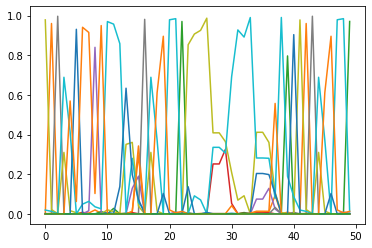

In [39]:
plt.plot(pred)
plt.show()

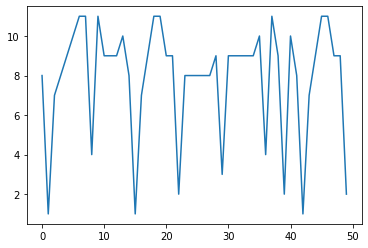

In [45]:
plt.plot(y_train)
plt.show()

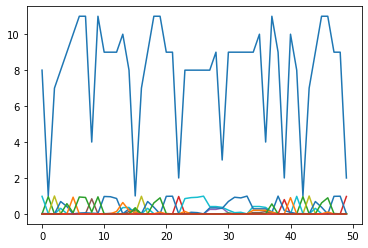

In [47]:
plt.plot(y_train)
plt.plot(pred)
plt.show()

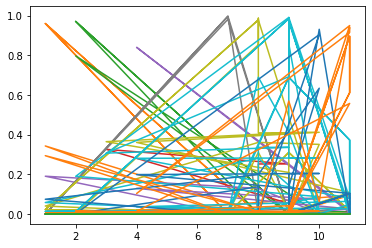

In [46]:
plt.plot(y_train, pred)
plt.show()

In [ ]:
# ?????????